In [3]:
import sys
import gc
import time
import numpy as np
import psutil
%matplotlib inline

import pandas as pd

%pylab inline
#import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

import concurrent.futures
from astropy.table import Table
from astropy.io import fits
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
from matplotlib.backends.backend_pdf import PdfPages
from matplotlib.colors import LogNorm
from decimal import *
from importlib import reload

from scipy.ndimage import zoom 
from mpl_toolkits.axes_grid.inset_locator import inset_axes

print('done')

Populating the interactive namespace from numpy and matplotlib
done


/usr/lib/python3/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['ylim', 'xlim']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [4]:
#needed for reload
import procedures
reload (procedures)
#import without needing procedures.module
from procedures import *

import plots_input
reload (plots_input)
from plots_input import *

import plots_to_run
reload (plots_to_run)
from plots_to_run import *


#to force python to free allocated memory
G_MR = None
G_MRII = None
#release unused memory
gc.collect()
    
#DirName_MR = '/net/bootes//export/data1/Millennium/modified_trees/treedata/'   
DirName_MR = '/scratch-ssd/Millennium2/BigRun/modified_trees/treedata/'   
    
FirstFile = 0
LastFile =  0

MR=0
MRII=1

#global Volume_MR
#global Volume_MRII 
Volume_MR = (BoxSize_MR**3.0) * (LastFile - FirstFile + 1) / MaxTreeFiles / Hubble_h**3
Volume_MRII = (BoxSize_MRII**3.0) * (LastFile - FirstFile + 1) / MaxTreeFiles  / Hubble_h**3

from struct_tree_MR import LGalaxiesStruct as LGalaxiesStruct_1
from struct_tree_MR import PropertiesToRead as PropertiesToRead_1  
from struct_tree_dbids_MR import LGalaxiesStruct as LGalaxiesStruct_2
from struct_tree_dbids_MR import PropertiesToRead as PropertiesToRead_2  

   
if(MR==1):
    SIM_Prefix=''
    SIM_LastSnap='063'
    start = time.time()
    (G_MR, G_MR_IDS) = read_halo_tree(DirName_MR, SIM_Prefix, SIM_LastSnap, FirstFile,LastFile,
                            PropertiesToRead_1,LGalaxiesStruct_1, PropertiesToRead_2,LGalaxiesStruct_2)        


from struct_tree_dbids_MRII import LGalaxiesStruct as LGalaxiesStruct_2
from struct_tree_dbids_MRII import PropertiesToRead as PropertiesToRead_2  

if(MRII==1):
    SIM_Prefix='sf1_'
    SIM_LastSnap='067'
    start = time.time()
    (G_MRII, G_MRII_IDS) = read_halo_tree(DirName_MR, SIM_Prefix, SIM_LastSnap, FirstFile, LastFile,
                              PropertiesToRead_1,LGalaxiesStruct_1, PropertiesToRead_2,LGalaxiesStruct_2)        
    
    
       
  
#release unused memory
gc.collect()
    


print(f"{sys.getsizeof(G_MRII)/1e9:0.2f} Gb" )
#print(sys.getsizeof(G_MR_new)/1e9)

print('reading done\n')
#print (np.log10(G_MR['DiskMass'][0:99]*1.e10))
#print (np.log10(G_MR['BulgeMass'][0:99]*1.e10))
#print (np.log10(G_MR['StellarMass'][0:99]*1.e10))
#print (np.log10(G_MR['MetalsStellarMass'][0:99]*1.e10))
print (G_MRII[0])
print (G_MRII[1])
print (G_MRII[2])
#help(G_MR)
 

#print(G_MR['Type'][0:99])
#print(np.log10(G0_MR['StellarMass']*1.e10))
#print(np.log10(G0_MR['HotGas']*1.e10))





Reading Headers For Halo File

TotNHalos= 91130412


Reading File 0, nHalos = 91130412

reading of halos done


9.11 Gb
reading done

(0, 92043363, 67663.79, 83406.45, [70.46422 , 14.923662, 69.19413 ], 67, 0, 0, 0, 0, 0, 0, 0, 0, 0.)
(1, 91499532, 73127.29, 82877.695, [70.5012  , 14.937056, 69.203354], 66, 0, 0, 0, 0, 0, 0, 0, 0, 0.)
(2, 88398913, 75714.32, 81887.875, [70.487686, 14.961599, 69.204865], 65, 0, 0, 0, 0, 0, 0, 0, 0, 0.)


### Accretion History

In [5]:
file=Datadir+'Database_snapshots_table.fits'
fits_table=fits.open(file)
snap_table = fits_table[1]       
FullRedshiftList=snap_table.data['z'][::-1]
FullTimeList=snap_table.data['lookBackTime'][::-1]
    
FullTimeList=FullTimeList[FullRedshiftList>0.]
FullRedshiftList=FullRedshiftList[FullRedshiftList>0.]



plot_linestyle=[':','-.','--','-']
#plot_linestyle=['--','-',':']

fig = plt.figure(figsize=(two_one_size_small[0]+1.0,two_one_size_small[1]))
subplot=plt.subplot()  
#xlim=[8.5,15.]
xlim=[10.5,15.]
xlim=[-5.0,0.]
ylim=[-4.0, 0.0]
    
subplot.set_ylim(ylim), subplot.set_xlim(xlim)
    
#format axis
#majorFormatter = FormatStrFormatter('%d')
#subplot.xaxis.set_major_locator(MultipleLocator(2.0))    
#subplot.xaxis.set_minor_locator(MultipleLocator(0.5)) 
#subplot.yaxis.set_major_locator(MultipleLocator(2.0))    
#subplot.yaxis.set_minor_locator(MultipleLocator(0.5)) 
   
xlab='$\log_{10}(M_{\mathrm{vir}}[\mathrm{M}_{\odot}])$'
ylab='Fraction'          
subplot.set_xlabel(xlab, fontsize=14), subplot.set_ylabel(ylab, fontsize=14)    
    
G_MR['M_TopHat'] =  G_MR['Len']*0.0961104
    
    
#11.0,12.0,13.0,14.0
HaloMassBins=np.arange(11.0,15.0,1.0)
HaloMassBins=np.arange(12.0,16.0,1.0)    

Final_Snap = 63
for kk in range (0,len(HaloMassBins)):
    print("Doing Mvir = %0.1f" % HaloMassBins[kk])
    
    G0_MR=G_MR[(G_MR['SnapNum']==Final_Snap) & (G_MR['HaloID']==G_MR['FirstHaloInFOFgroupID']) & 
               (np.log10(G_MR['M_Crit200']*1.e10/Hubble_h)>HaloMassBins[kk]-0.1) & 
               (np.log10(G_MR['M_Crit200']*1.e10/Hubble_h)<HaloMassBins[kk]+0.1)]
    
    '''Ntrees=len(G0_MR)
    #select only trees with monotonically increasing mass on main branch
    bad_tree_flag = np.zeros(len(G0_MR), dtype = np.int32)
    for ii in range(0,Ntrees):        
        G_Tree=G_MR[(G_MR['HaloID']>=G0_MR['HaloID'][ii]) & (G_MR['HaloID']<=G0_MR['LastProgenitorID'][ii])]  
        
        Mvir = G0_MR['M_TopHat'][ii]
        Final_Mvir = G0_MR['M_TopHat'][ii]
        
        currentHaloID = G0_MR['HaloID'][ii]     
        while True:           
            progID = G_Tree['FirstProgenitorID'][G_Tree['HaloID']==currentHaloID]            
            G_Prog = G_Tree[G_Tree['HaloID']==progID]
            
            #print(Mvir-G_Tree['M_Crit200'][G_Tree['HaloID']==progID][0])
            if(G_Prog['M_TopHat']>Mvir):
                bad_tree_flag[ii]=1
                break
            
            if(G_Prog['M_TopHat']/Mvir<0.1):
                break
            
            Mvir = G_Prog['M_TopHat']
           
            currentHaloID = progID               
            if progID == -1:
                break  
                
    sel = bad_tree_flag == 0
    print("Fraction of good trees = %0.2f" % (1.*len(G0_MR[sel])/len(G0_MR)))            
    G0_MR = G0_MR[sel]'''
     
    
    
   
    
    if(kk<2):
        Ntrees = 1000
    else:
        Ntrees=300
    Ntrees=500
    Ntrees=min(Ntrees,len(G0_MR))
  
    print(Ntrees)
    
    bin=0.5
    limits = [10.0,15.0]
    bin_arr = np.arange(limits[0],limits[1]+bin,bin)
    x_axis = bin_arr[0:len(bin_arr)-1]+bin/2.    
    Mvir_hist=np.zeros([len(bin_arr)-1,Ntrees],dtype=np.float32)    
    totalProgMass=np.zeros(Ntrees,dtype=np.float32)    
    FinalMass=np.zeros(Ntrees,dtype=np.float32)    
    
    #for ll in range(0,Ntrees):
    #    print("M_Crit200=%0.2f" % np.log10(G0_MR["M_Crit200"][ll]*1e10/Hubble_h))
    
    for ii in range(0,Ntrees):
        if(Ntrees>10):
            if(ii%(int(Ntrees/10.)) ==0):
                print("Doing Tree %d of %d" % (ii,Ntrees))
            
        initial_HaloID = G0_MR['HaloID'][ii]   
        G_Tree=G_MR[(G_MR['HaloID']>=G0_MR['HaloID'][ii]) & (G_MR['HaloID']<=G0_MR['LastProgenitorID'][ii])]  
        FinalMass[ii]=np.log10(G0_MR['M_TopHat'][ii]*1.e10/Hubble_h)
        #print(FinalMass[ii])
            
        #skip tree with a single galaxy
        HalosInTree = len(G_Tree)
        SnapsInTree = (1+G0_MR['SnapNum'][ii]-G_MR['SnapNum'][G_MR['HaloID']==G0_MR['LastProgenitorID'][ii]])         
        if(((HalosInTree)-1) <= SnapsInTree):
            continue
           
        
        #count number of non main progenitors
        Nprogenitors=0  
        currentHaloID = initial_HaloID
        while True:    
            descendants = G_Tree['DescendantID']==currentHaloID
            if(len(G_Tree['HaloID'][descendants])>1):
                Nprogenitors += (len(G_Tree['HaloID'][descendants])-1)                
            progID = G_Tree['FirstProgenitorID'][G_Tree['HaloID']==currentHaloID]
            currentHaloID = progID               
            if progID == -1:
                break
        #print("Nprogenitors: %d" %(Nprogenitors))    
            
        Redshift=np.zeros(Nprogenitors,dtype=np.float32)    
        Mvir=np.zeros(Nprogenitors,dtype=np.float32)           
        MainHaloMvir=np.zeros(len(FullRedshiftList),dtype=np.float32)        
            
        
        Nprogenitors=0  
        Nsnaps=0
        currentHaloID = initial_HaloID
        
        current_Mvir = FinalMass[ii]
        while True: 
            G_currentHalo = G_Tree[G_Tree['HaloID']==currentHaloID]
            MainHaloMvir[Nsnaps]=np.log10(G_currentHalo['M_Crit200']*1.e10/Hubble_h)
            
            #print("Snap=%d MainHaloMass=%0.3f" % (G_currentHalo['SnapNum'],MainHaloMvir[Nsnaps]))
             
            #select all progenitor gals
            G_Prog_Gals=G_Tree[(G_Tree['DescendantID']==currentHaloID)] 
            #select main progenitor
            FirstProgID = G_Tree['FirstProgenitorID'][G_Tree['HaloID']==currentHaloID]  
            G_FirstProg = G_Tree[G_Tree['HaloID']==FirstProgID]  
            
            #print(current_Mvir,np.log10(G_FirstProg['M_TopHat'][0]*1.e10/Hubble_h))
            
            Mass_dif = np.log10(10**current_Mvir-10**np.log10(G_FirstProg['M_TopHat']*1.e10/Hubble_h))
            
            #print("Mass diff = %0.5f" % Mass_dif)
            current_Mvir = np.log10(G_FirstProg['M_TopHat']*1.e10/Hubble_h)
            
            #sel all non main progenitor gals      
            G_Prog_Gals=G_Prog_Gals[G_Prog_Gals['HaloID']!= FirstProgID]
            #print(G_Prog_Gals['Len']*0.0961104*1.e10/Hubble_h)
            
            progMass=0            
            for jj in range(0,len(G_Prog_Gals)):
                Redshift[Nprogenitors+jj]=G_Prog_Gals['Redshift'][jj]  
                Mvir[Nprogenitors+jj]=np.log10(G_Prog_Gals['M_TopHat'][jj]*1.e10/Hubble_h)                       
                     
                progMass+=G_Prog_Gals['M_TopHat'][jj]*1.e10/Hubble_h
            
            #print("Mass diff=%0.3f Mass fraction in mergers = %0.3f" % (Mass_dif, progMass/10**Mass_dif))
            
            #Nprogenitors+=len(G_Tree['HaloID'][G_Tree['DescendantGal']==currentHaloID])-1 
            Nprogenitors+=len(G_Prog_Gals)
               
            #stop if the main progenitor of current galaxy has Mvir<0.1 x final_Mvir
            if(np.log10(G_FirstProg['M_TopHat']*1.e10/Hubble_h) < (FinalMass[ii]-1.)):  
                break  
           
            #stop if there are no more progenitors
            progID = G_Tree['FirstProgenitorID'][G_Tree['HaloID']==currentHaloID]
            currentHaloID = progID 
            if(progID == -1):
                break
            Nsnaps+=1  
                  
        #print(Mvir)
        hist_MR=np.histogram(Mvir, bins=bin_arr, range=(xlim[0],xlim[1]))          
        hist_MR=hist_MR[0]         
        #divide by bin value over (final_mass-0.1*final_mass) to get the percetange fraction of mass
        #in each bin
        Mass_dif = 10**FinalMass[ii]-10**(FinalMass[ii]-1.)
        Mvir_hist[:,ii]=hist_MR * (10**x_axis)/Mass_dif          
        totalProgMass[ii]=np.log10(np.sum(10**Mvir,axis=0))        
        
    #for ll in range(0,Ntrees):
        #print(Mvir_hist[:,ii])
        #print(10**totalProgMass[ll]/10**FinalMass[ll])
        
    #CHANGE HERE
    final_hist_mean=np.zeros(len(x_axis),dtype=np.float32)   
    final_hist_median=np.zeros(len(x_axis),dtype=np.float32)   
    for ii in range(0, len(x_axis)):
        #print(x_axis[ii]-HaloMassBins[kk], Mvir_hist[ii,:])
        final_hist_mean[ii] = np.mean(Mvir_hist[ii,:])
        final_hist_median[ii] = np.median(Mvir_hist[ii,:])
    
    sel = x_axis>11.0
    subplot.plot(x_axis[sel]-HaloMassBins[kk], np.log10(final_hist_mean[sel]), linestyle=plot_linestyle[kk], linewidth=2, color='gray')
    #subplot.plot(x_axis, np.log10(final_hist_median), linestyle=plot_linestyle[kk], linewidth=2, color='gray')
    print("Mass in mergers=%0.2f" % sum(final_hist_mean))
       
    #subplot.plot(np.log10((10**x_axis/10**HaloMassBins[kk])), np.log10(final_hist_mean), 
    #             linestyle=plot_linestyle[kk], linewidth=2, color='gray')
         
plt.tight_layout()   
current_function =  inspect.getframeinfo(inspect.currentframe()).function   
plt.savefig('./fig/plots_Halo_accretion_history.pdf')
plt.close()        

print("plots done")
    

Doing Mvir = 12.0


/export/data1/Workspace/GitHub_Python_plots/py3env/lib/python3.6/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in log10
/export/data1/Workspace/GitHub_Python_plots/py3env/lib/python3.6/site-packages/ipykernel_launcher.py:48: RuntimeWarning: divide by zero encountered in log10


500
Doing Tree 0 of 500


/export/data1/Workspace/GitHub_Python_plots/py3env/lib/python3.6/site-packages/ipykernel_launcher.py:160: RuntimeWarning: invalid value encountered in log10
/export/data1/Workspace/GitHub_Python_plots/py3env/lib/python3.6/site-packages/ipykernel_launcher.py:160: RuntimeWarning: divide by zero encountered in log10
/export/data1/Workspace/GitHub_Python_plots/py3env/lib/python3.6/site-packages/ipykernel_launcher.py:148: RuntimeWarning: divide by zero encountered in log10


Doing Tree 50 of 500
Doing Tree 100 of 500
Doing Tree 150 of 500
Doing Tree 200 of 500
Doing Tree 250 of 500
Doing Tree 300 of 500
Doing Tree 350 of 500


/export/data1/Workspace/GitHub_Python_plots/py3env/lib/python3.6/site-packages/ipykernel_launcher.py:182: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.


Doing Tree 400 of 500
Doing Tree 450 of 500


/export/data1/Workspace/GitHub_Python_plots/py3env/lib/python3.6/site-packages/ipykernel_launcher.py:214: RuntimeWarning: divide by zero encountered in log10


Mass in mergers=0.26
Doing Mvir = 13.0
500
Doing Tree 0 of 500
Doing Tree 50 of 500
Doing Tree 100 of 500
Doing Tree 150 of 500
Doing Tree 200 of 500
Doing Tree 250 of 500
Doing Tree 300 of 500
Doing Tree 350 of 500
Doing Tree 400 of 500
Doing Tree 450 of 500
Mass in mergers=0.18
Doing Mvir = 14.0
500
Doing Tree 0 of 500
Doing Tree 50 of 500
Doing Tree 100 of 500
Doing Tree 150 of 500
Doing Tree 200 of 500
Doing Tree 250 of 500
Doing Tree 300 of 500
Doing Tree 350 of 500
Doing Tree 400 of 500
Doing Tree 450 of 500
Mass in mergers=0.17
Doing Mvir = 15.0
53
Doing Tree 0 of 53
Doing Tree 5 of 53
Doing Tree 10 of 53
Doing Tree 15 of 53
Doing Tree 20 of 53
Doing Tree 25 of 53
Doing Tree 30 of 53
Doing Tree 35 of 53
Doing Tree 40 of 53
Doing Tree 45 of 53
Doing Tree 50 of 53
Mass in mergers=0.11
plots done


In [5]:
G0_MRII = G_MRII[G_MRII['SnapNum']==67]
print(G0_MRII['FirstHaloInFOFgroup'][:2])

print(len(G0_MRII))
G0_MRII_rand = np.random.choice(G0_MRII, size=5000, replace=False)
print(len(G0_MRII_rand))

[0 0]
870320
5000


In [20]:
with PdfPages('./fig/plots_00.pdf') as pdf:  

    from mpl_toolkits.mplot3d import Axes3D 

    fig = plt.figure(figsize=(15,15))
    ax = fig.add_subplot(111, projection='3d')

    xlim=[0,100]
    ylim=[0,100]
    ax.scatter(G0_MRII_rand['Pos'][:,0], G0_MRII_rand['Pos'][:,1], G0_MRII_rand['Pos'][:,2], s=2)

    sel = G0_MRII_rand['Pos'][:,1]>10
    ax.scatter(G0_MRII_rand['Pos'][sel,0], G0_MRII_rand['Pos'][sel,1], G0_MRII_rand['Pos'][sel,2], 
               s=2, color='red')
    
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    
    pdf.savefig()
    plt.close()

1065430


(0, 20)

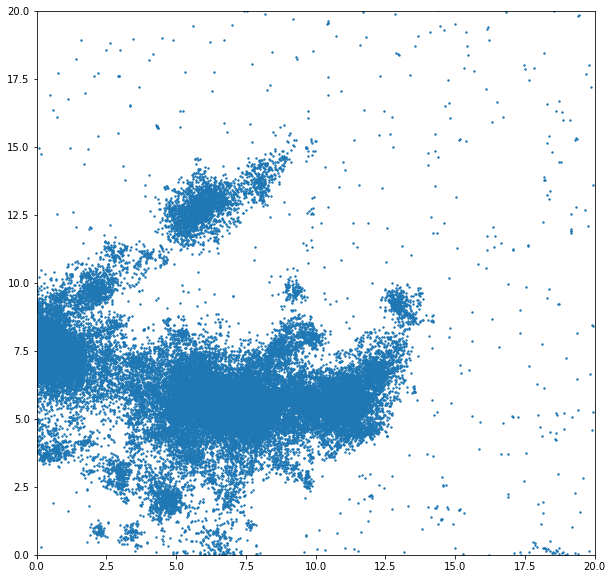

In [17]:
G0_MRII = G_MRII[G_MRII['SnapNum']==57]

G0_MRII_rand = G0_MRII
print(len(G0_MRII_rand))

fig, ax = plt.subplots(figsize=(10,10))
xlim=[0,20]
ylim=[0,20]
plt.scatter(G0_MRII_rand['Pos'][:,0], G0_MRII_rand['Pos'][:,1], s=2)

ax.set_xlim(xlim)
ax.set_ylim(ylim)